In [27]:
import scipy.stats as sts
from scipy.stats import invgauss
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

In [377]:
np.random.seed(42)
y = sts.uniform(loc=0, scale=1) # задали равномерное распределение [0,1]
sample_rv = y.rvs(size=100) # генерация выборки из этого распр-я

In [378]:
def laplace_cdf(x, mu=0, b=1):
    if x < mu:
        return 1/2*np.exp((x-mu)/b)
    else:
        return 1 - 1/2*np.exp(-(x-mu)/b)
    
def inverse_laplace_cdf(y, mu=0, b=1, size=100):
    return mu - b*np.sign(y-0.5)*np.log(1-2*np.abs(y-0.5))

In [379]:
X = np.sort([inverse_laplace_cdf(i) for i in sample_rv]) # генерация выборки 

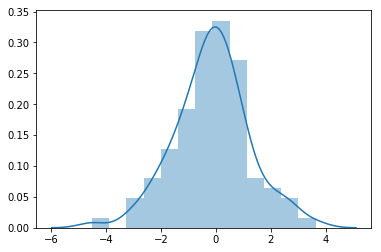

In [380]:
sns.distplot(X)

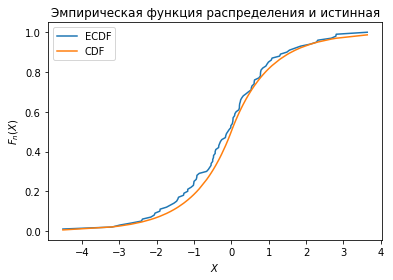

In [381]:
ecdf = ECDF(X)
plt.plot(ecdf.x, ecdf.y, label='ECDF')
plt.plot(X, [laplace_cdf(i) for i in X], label='CDF')
plt.title('Эмпирическая функция распределения и истинная')
plt.xlabel('$X$')
plt.ylabel('$F_n(X)$')
plt.legend()

In [382]:
# Тест Колмогорова-Смирнова F_inverse with F_laplace
print(sts.kstest(X, 'laplace', args=(0, 1)))
# Тест Колмогорова-Смирнова F_inverse with F_exp
print(sts.kstest(X, 'expon', args=(0, 1)))

KstestResult(statistic=0.08032621784164029, pvalue=0.5221049503233056)
KstestResult(statistic=0.53, pvalue=9.783646983229687e-27)


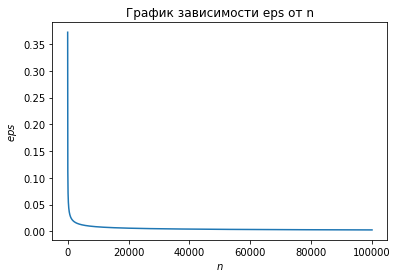

In [358]:
# варьируя различные значения n построить график зависимости 𝜀 (из
# неравенства DKW) от n (при фиксированном 𝛼 = 0.05)
alpha=0.5
N = np.arange(5, 100000, 10)
eps = lambda n: np.sqrt(np.log(2/alpha)/(2*n))
plt.plot(N, [eps(n) for n in N])
plt.xlabel('$n$')
plt.ylabel('$eps$')
plt.title('График зависимости eps от n')
plt.show()